In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from tqdm import tqdm
import discrete_opinion as dp

## Propaganda vs mu

In [2]:
def most_frequent_value(arr,propaganda):
    values, counts = np.unique(arr, return_counts=True)
    smax = np.max(counts)
    sprop_index = np.where(values == propaganda)[0][0]
    sprop = counts[sprop_index]
    
    return smax, sprop
    

In [3]:
ob1 = dp.Global(size = 1000, options = 100)

In [7]:
tol = np.arange(0,100,1) # Tolerance
resres1 = []
resres2 = []
for rep in tqdm(range(50)):
    res1 = np.empty(100) #Save smax
    res2 = np.empty(100) #Save sprop
    for i in tol:
        lisq = ob1.simul_global_evol(i, 100/100, 150000, 50)
        smax, sprop = most_frequent_value(lisq,50)
        res1[i] = smax
        res2[i] = sprop
    resres1.append(res1)
    resres2.append(res2)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [13:59<00:00, 16.79s/it]


In [9]:

mean_res1 = np.mean(resres1, axis =0)
mean_res2 = np.mean(resres2, axis =0)

In [8]:
smax_data = pd.DataFrame(resres1, index = None)
sprop_data = pd.DataFrame(resres2, index = None)

smax_data.to_csv('data/smax_vs_mu_i100_prop50.csv')
sprop_data.to_csv('data/sprop_vs_mu_i100_prop50.csv')

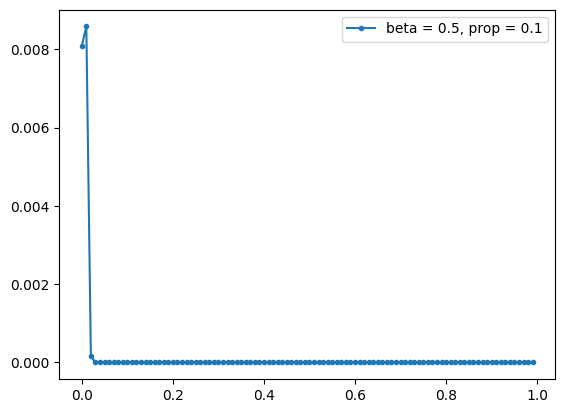

In [10]:
plt.plot(tol/100,abs(mean_res1-mean_res2)/1000,'.-',label = 'beta = 0.5, prop = 0.1')
plt.legend()

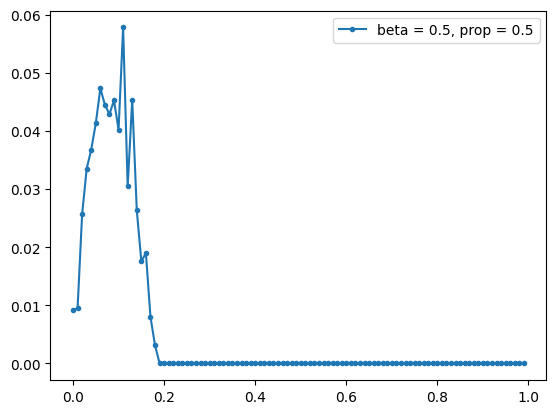

In [96]:
plt.plot(tol/100,abs(mean_res1-mean_res2)/1000,'.-',label = 'beta = 0.5, prop = 0.5')
plt.legend()

## Data complete $\beta = 0.5$

In [4]:
stot = []
ptot = []
for prop in range(1,100):
    s = pd.read_csv(f"raw_data/data_prop_vs_tol_inten50/smax_vs_mu_p{prop}.csv")
    p = pd.read_csv(f"raw_data/data_prop_vs_tol_inten50/sprop_vs_mu_p{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

C:\Users\RAUL\AppData\Local\Temp\ipykernel_18716\529742783.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10((stot - ptot)/1000),origin = "lower", cmap='magma')


([<matplotlib.axis.YTick at 0x1390709f670>,
 [Text(0, 9, '0.1'),
  Text(0, 19, '0.2'),
  Text(0, 29, '0.3'),
  Text(0, 39, '0.4'),
  Text(0, 49, '0.5'),
  Text(0, 59, '0.6'),
  Text(0, 69, '0.7'),
  Text(0, 79, '0.8'),
  Text(0, 89, '0.9')])

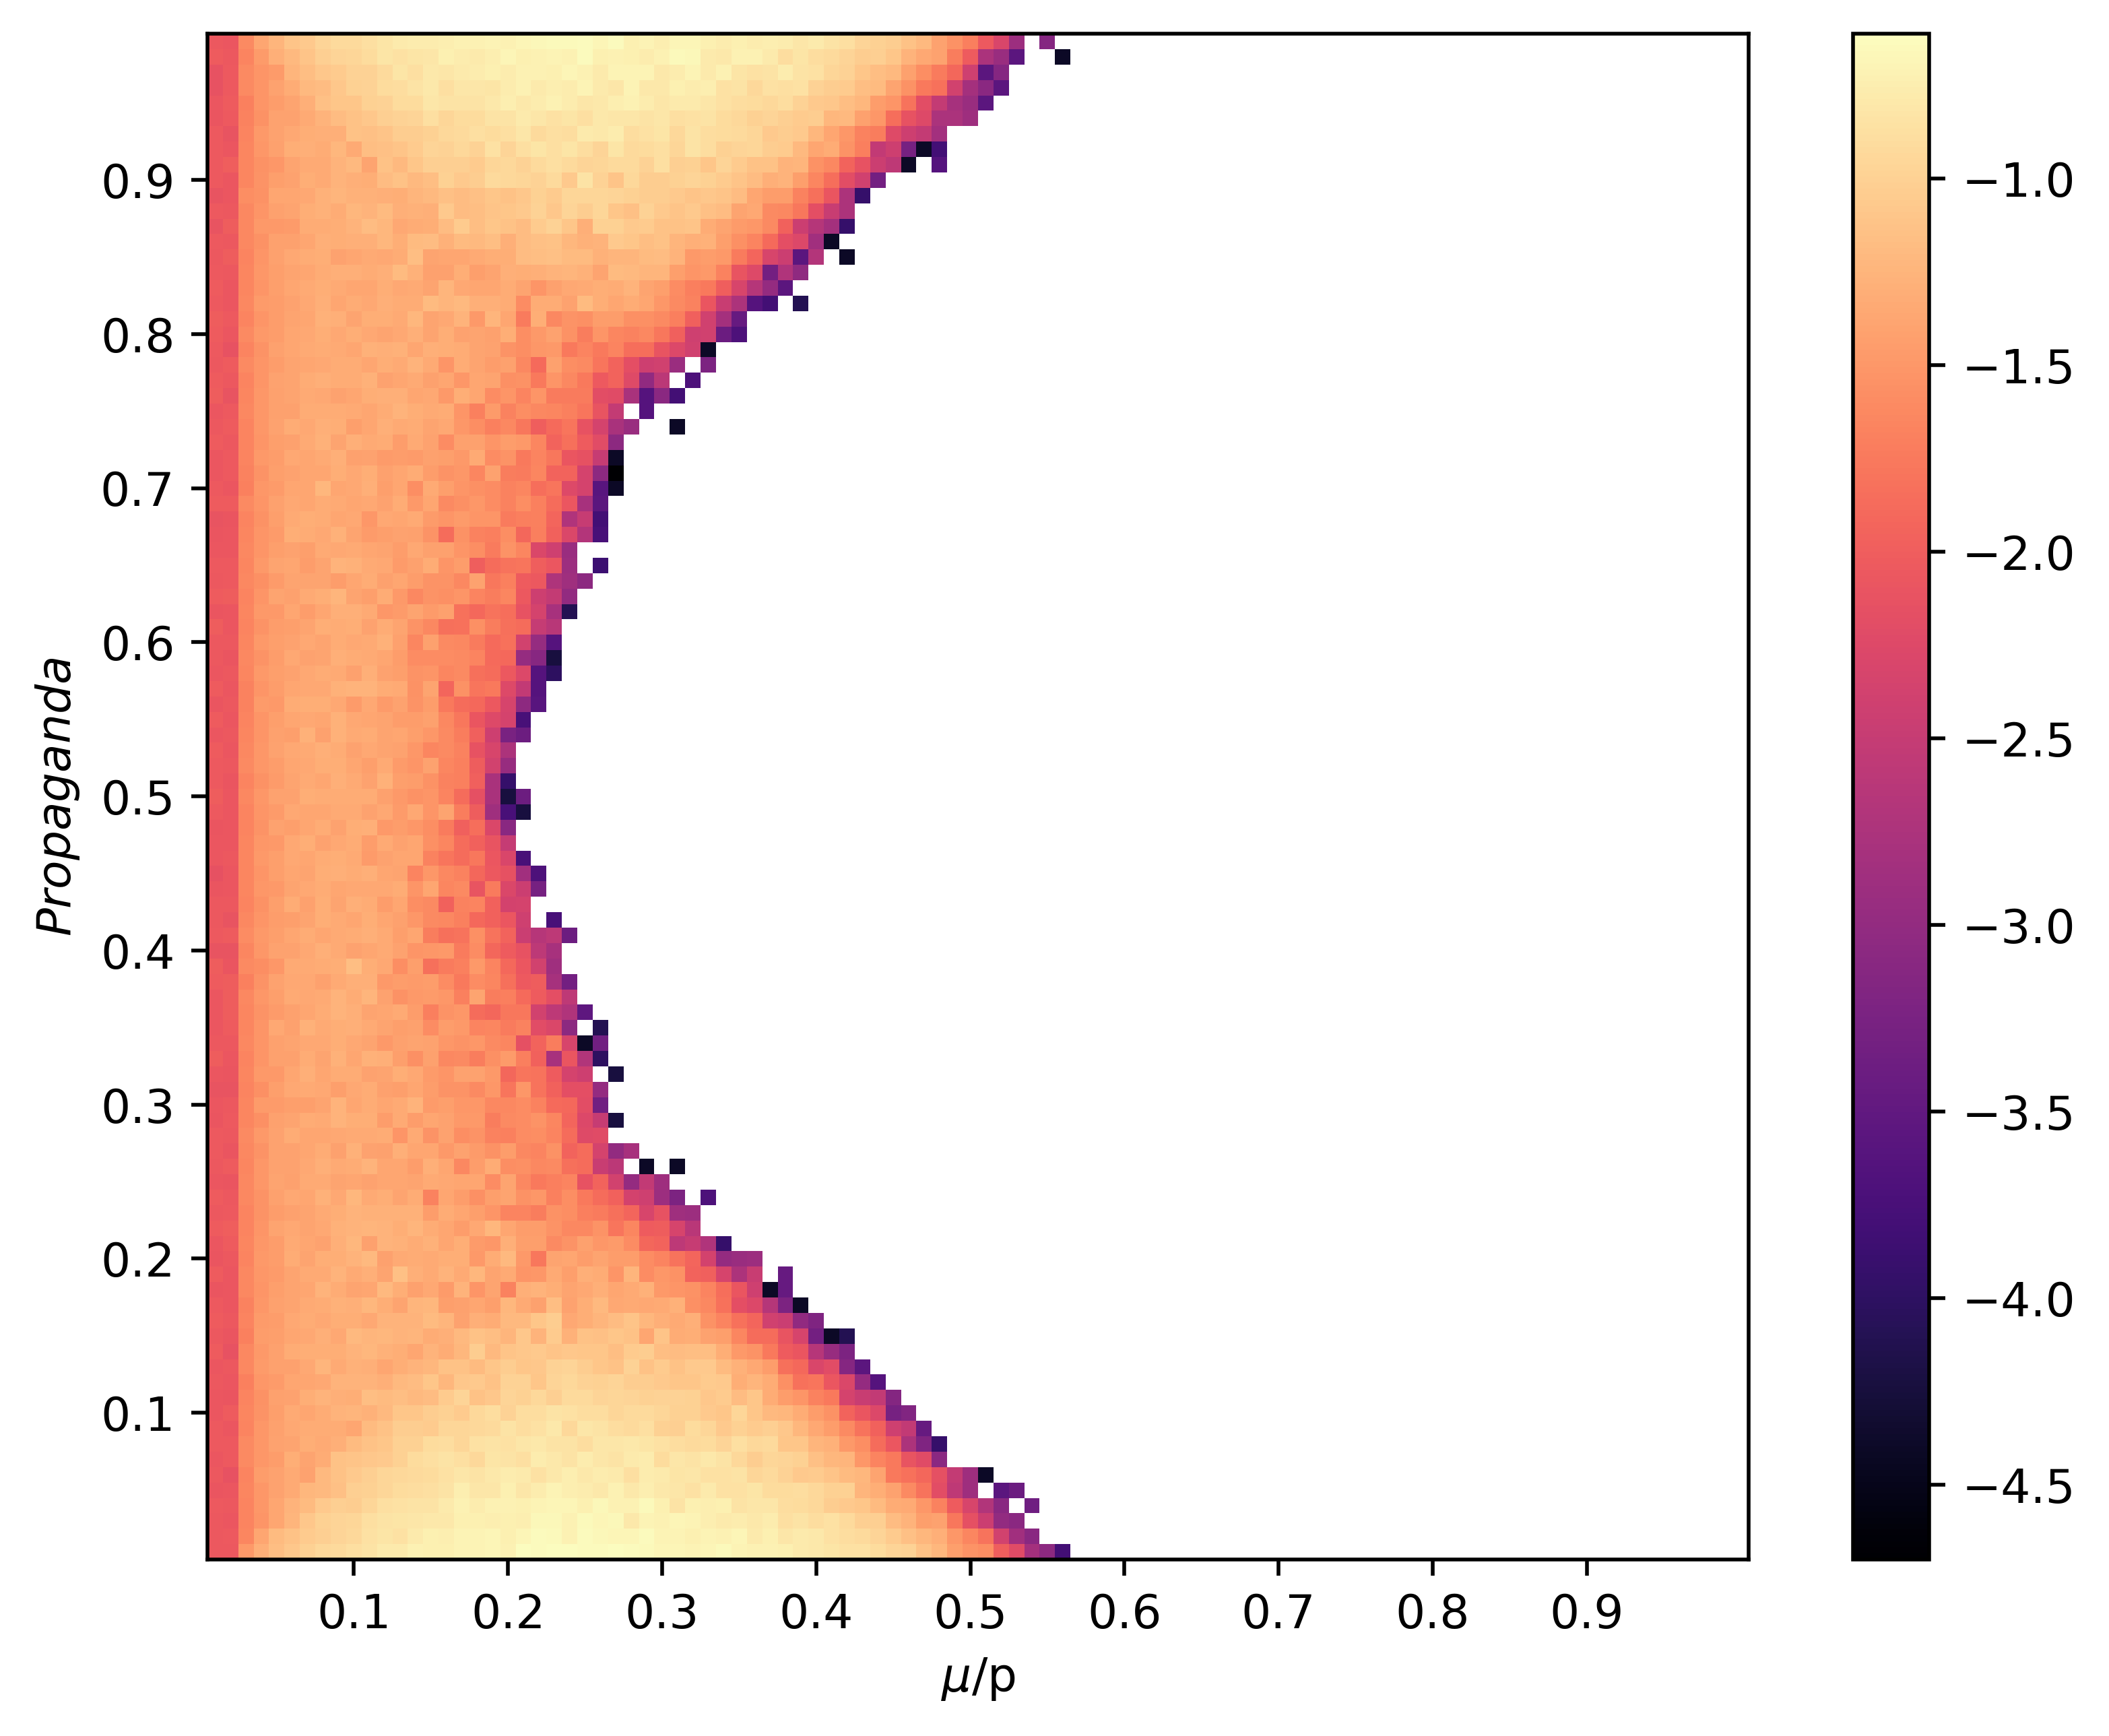

In [13]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(np.log10((stot - ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
#plt.savefig("Images/global_prop_vs_mu_n1000_p100_i050.png",dpi=500)

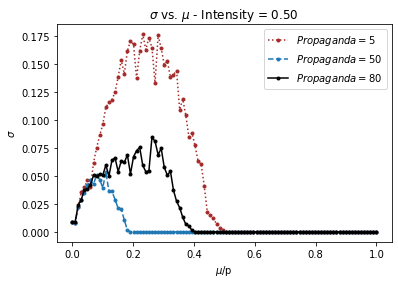

In [11]:
plt.plot(np.linspace(0,1,100),(stot[5]- ptot[5])/1000,'.:',color = 'brown',label = r'$Propaganda = 5$')
plt.plot(np.linspace(0,1,100),(stot[50]- ptot[50])/1000,'.--',label = r'$Propaganda = 50$')
plt.plot(np.linspace(0,1,100),(stot[85]- ptot[85])/1000,'.-', color = 'black',label = r'$Propaganda = 80$')
plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$\sigma$')
plt.title(r'$\sigma$ vs. $\mu$ - Intensity = 0.50 ')
plt.legend()
#plt.show()
plt.savefig("Images/profile_sigma_vs_mu_n1000_p100_intensity050.png", dpi = 500)

## $\beta = 0.8$

In [3]:
import os
dat = []
for prop in range(1,101,1):
    if os.path.isfile(f"data_b_08/smax_vs_mu_i0.8_prop{prop}.csv"):
        s = pd.read_csv(f"data_b_08/smax_vs_mu_i0.8_prop{prop}.csv")
        dat.append(s)
    else: 
        print("Is lacking: ", prop)

In [4]:
stot = []
ptot = []
for prop in range(1,101):
    s = pd.read_csv(f"data_b_08/smax_vs_mu_i0.8_prop{prop}.csv")
    p = pd.read_csv(f"data_b_08/sprop_vs_mu_i0.8_prop{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

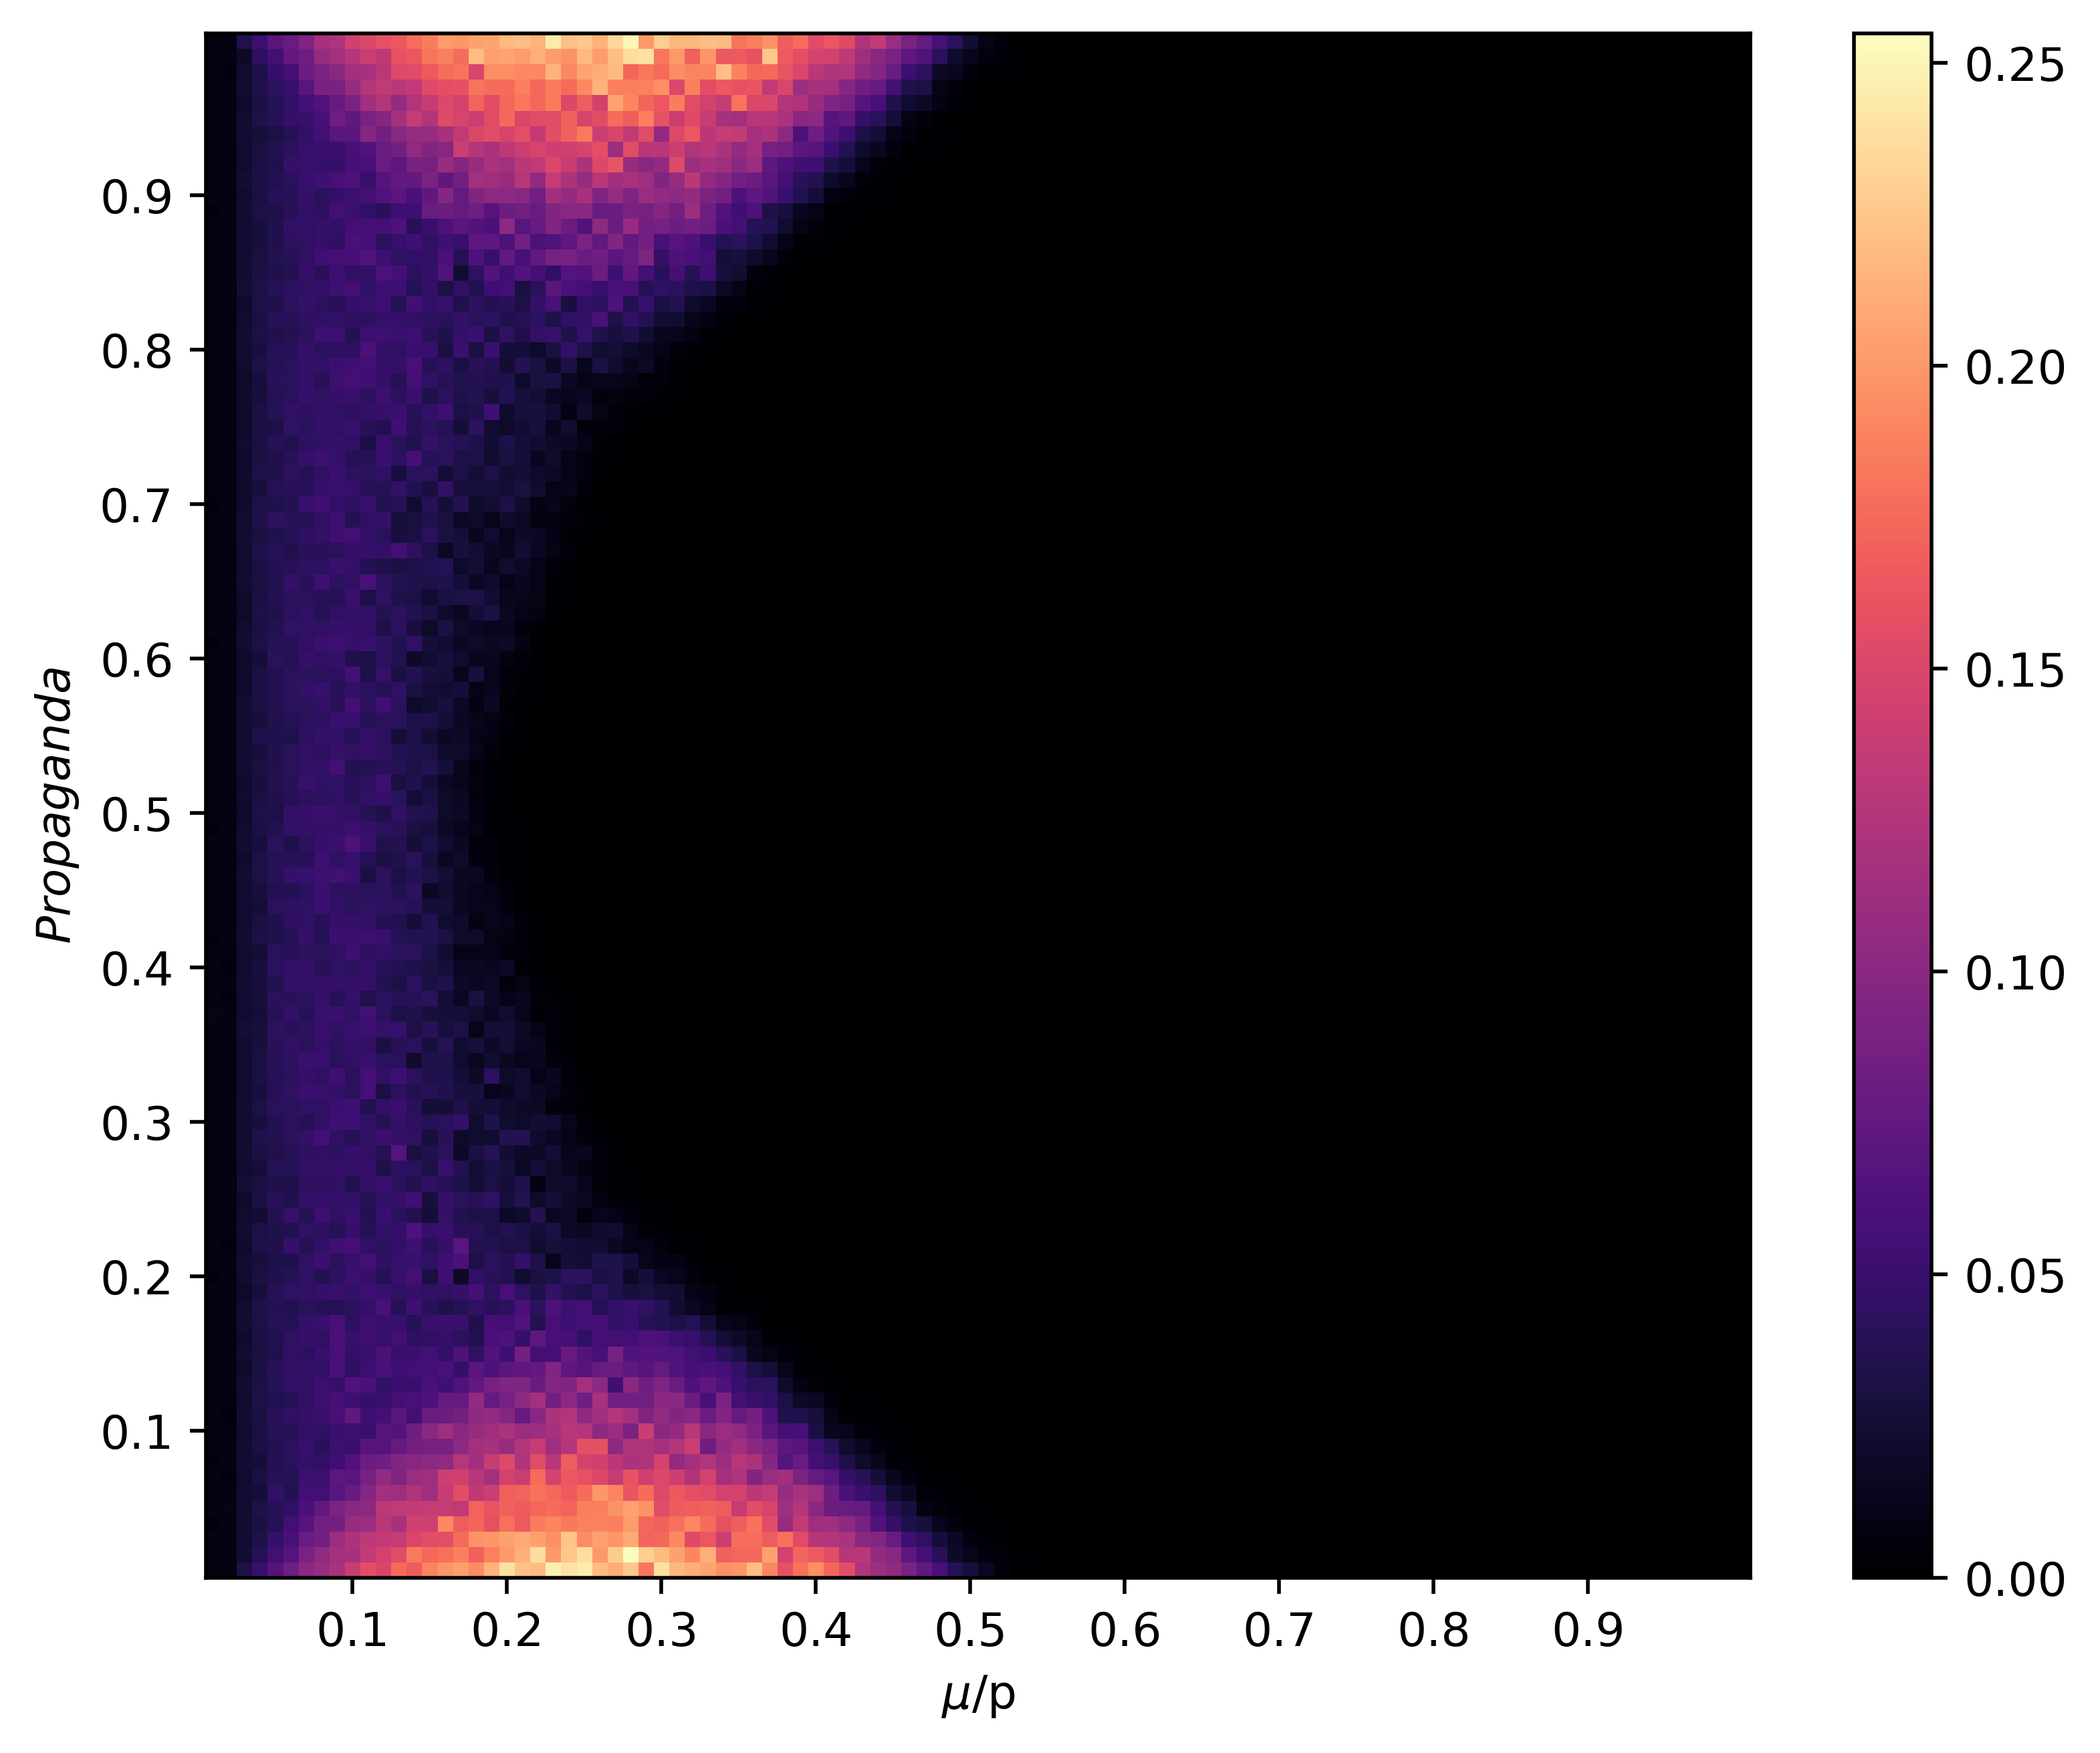

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(((stot - ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
plt.savefig("Images/sigma_prop_vs_mu_b08.png",dpi=500)

## $\beta = 1.0$

In [3]:
import os
dat = []
for prop in range(1,101,1):
    if os.path.isfile(f"data_b_10/smax_vs_mu_i1.0_prop{prop}.csv"):
        s = pd.read_csv(f"data_b_10/smax_vs_mu_i1.0_prop{prop}.csv")
        dat.append(s)
    else: 
        print("Is lacking: ", prop)

In [11]:
stot = []
ptot = []
for prop in range(1,101,1):
    s = pd.read_csv(f"data_b_10/smax_vs_mu_i1.0_prop{prop}.csv")
    p = pd.read_csv(f"data_b_10/sprop_vs_mu_i1.0_prop{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

In [12]:
stot 

array([[  18.86,   18.96,   21.38, ...,  970.04,  980.24,  989.7 ],
       [  18.6 ,   18.54,   31.04, ...,  980.18,  989.78, 1000.  ],
       [  18.78,   18.74,   30.66, ...,  989.6 , 1000.  , 1000.  ],
       ...,
       [  18.86,   18.62,   29.78, ...,  989.74, 1000.  , 1000.  ],
       [  19.26,   19.2 ,   30.76, ...,  979.24,  989.88, 1000.  ],
       [  18.84,   18.28,   20.38, ...,  968.94,  980.62,  989.56]])

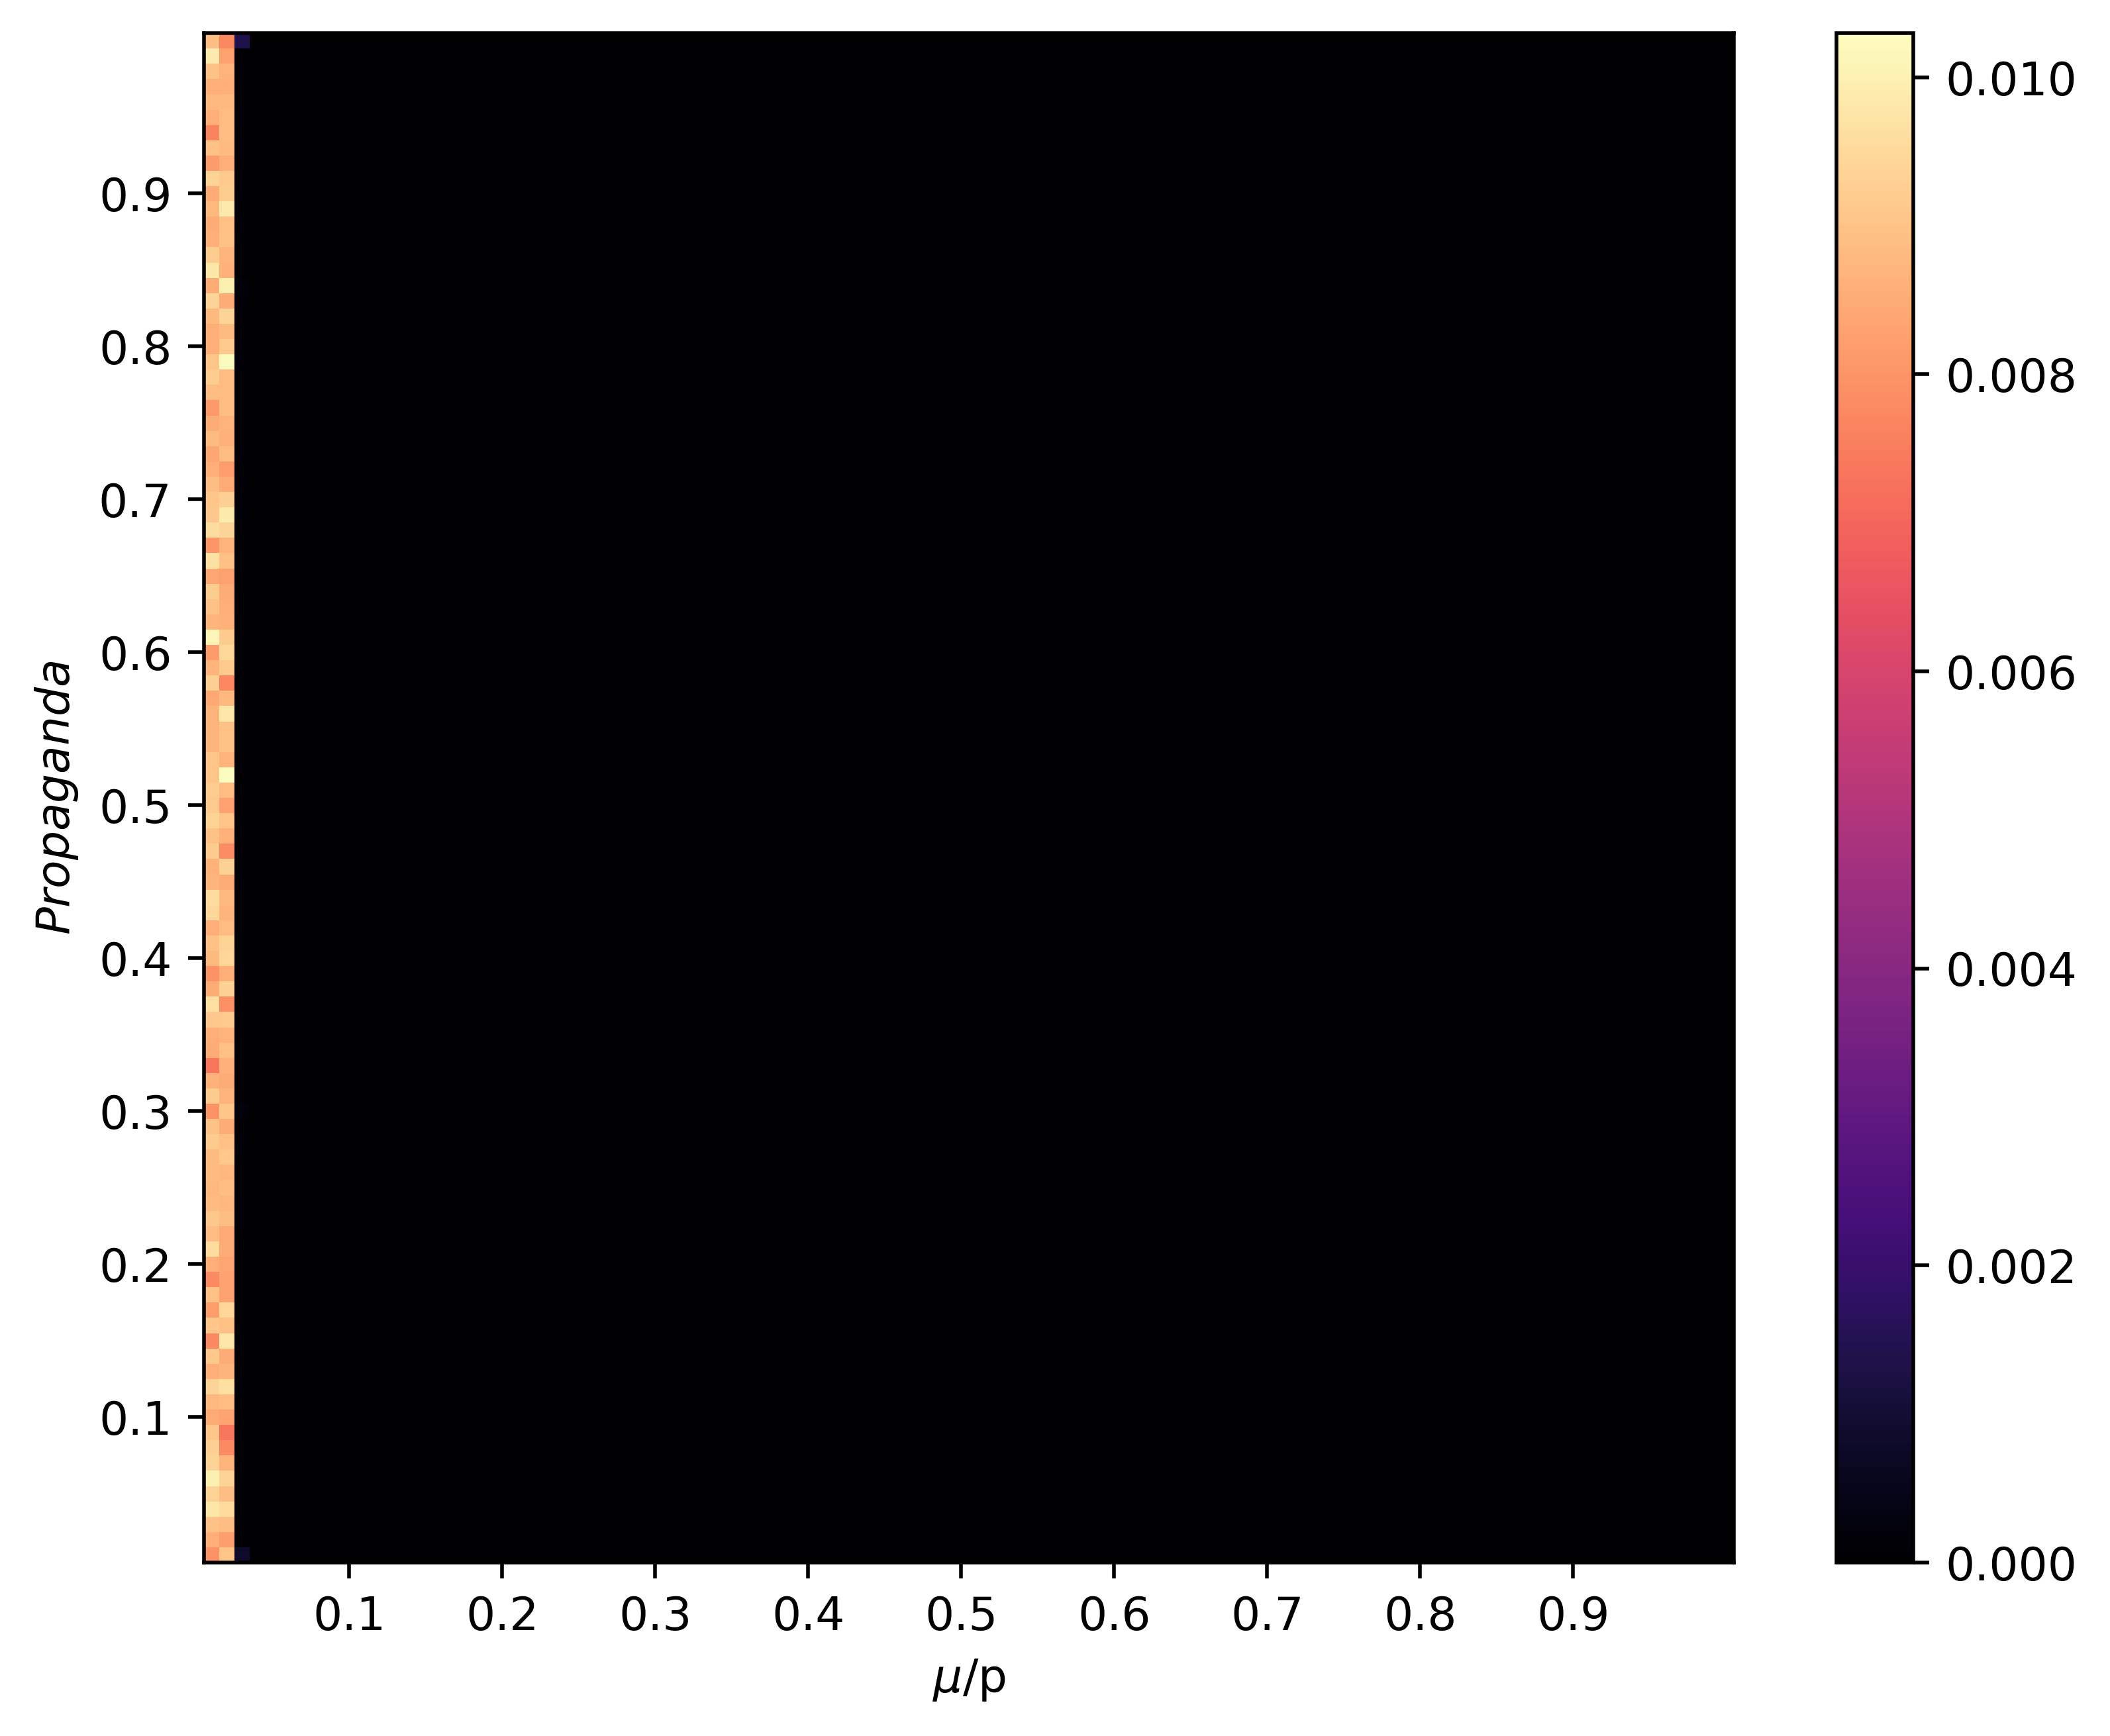

In [37]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(((stot- ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
plt.savefig("Images/sigma_prop_vs_mu_n1000_p100_i100.png",dpi=500)

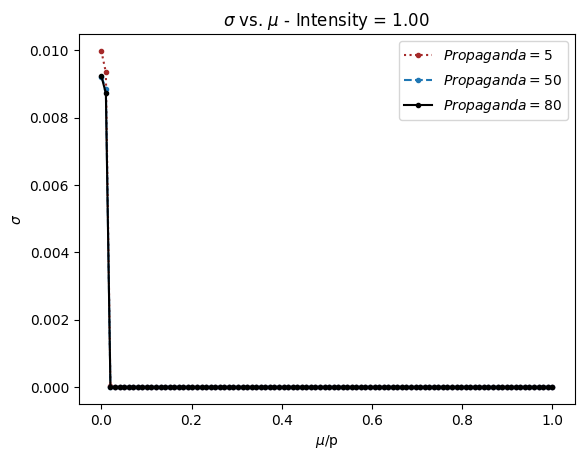

In [44]:
plt.plot(np.linspace(0,1,100),(stot[5]- ptot[5])/1000,'.:',color = 'brown',label = r'$Propaganda = 5$')
plt.plot(np.linspace(0,1,100),(stot[50]- ptot[50])/1000,'.--',label = r'$Propaganda = 50$')
plt.plot(np.linspace(0,1,100),(stot[85]- ptot[85])/1000,'.-', color = 'black',label = r'$Propaganda = 80$')
plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$\sigma$')
plt.title(r'$\sigma$ vs. $\mu$ - Intensity = 1.00 ')
plt.legend()
plt.show()
#plt.savefig("Images/profile_sigma_vs_mu_n1000_p100_intensity100.png", dpi = 500)

## $\beta = 0.9$

In [5]:
import os
dat = []
for prop in range(1,101,1):
    if os.path.isfile(f"data_b_09/smax_vs_mu_i0.9_prop{prop}.csv"):
        s = pd.read_csv(f"data_b_09/smax_vs_mu_i0.9_prop{prop}.csv")
        dat.append(s)
    else: 
        print("Is lacking: ", prop)

In [6]:
stot = []
ptot = []
for prop in range(1,101,1):
    s = pd.read_csv(f"data_b_09/smax_vs_mu_i0.9_prop{prop}.csv")
    p = pd.read_csv(f"data_b_09/sprop_vs_mu_i0.9_prop{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

/tmp/ipykernel_639/3313088213.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10((stot- ptot)/1000),origin = "lower", cmap='magma')


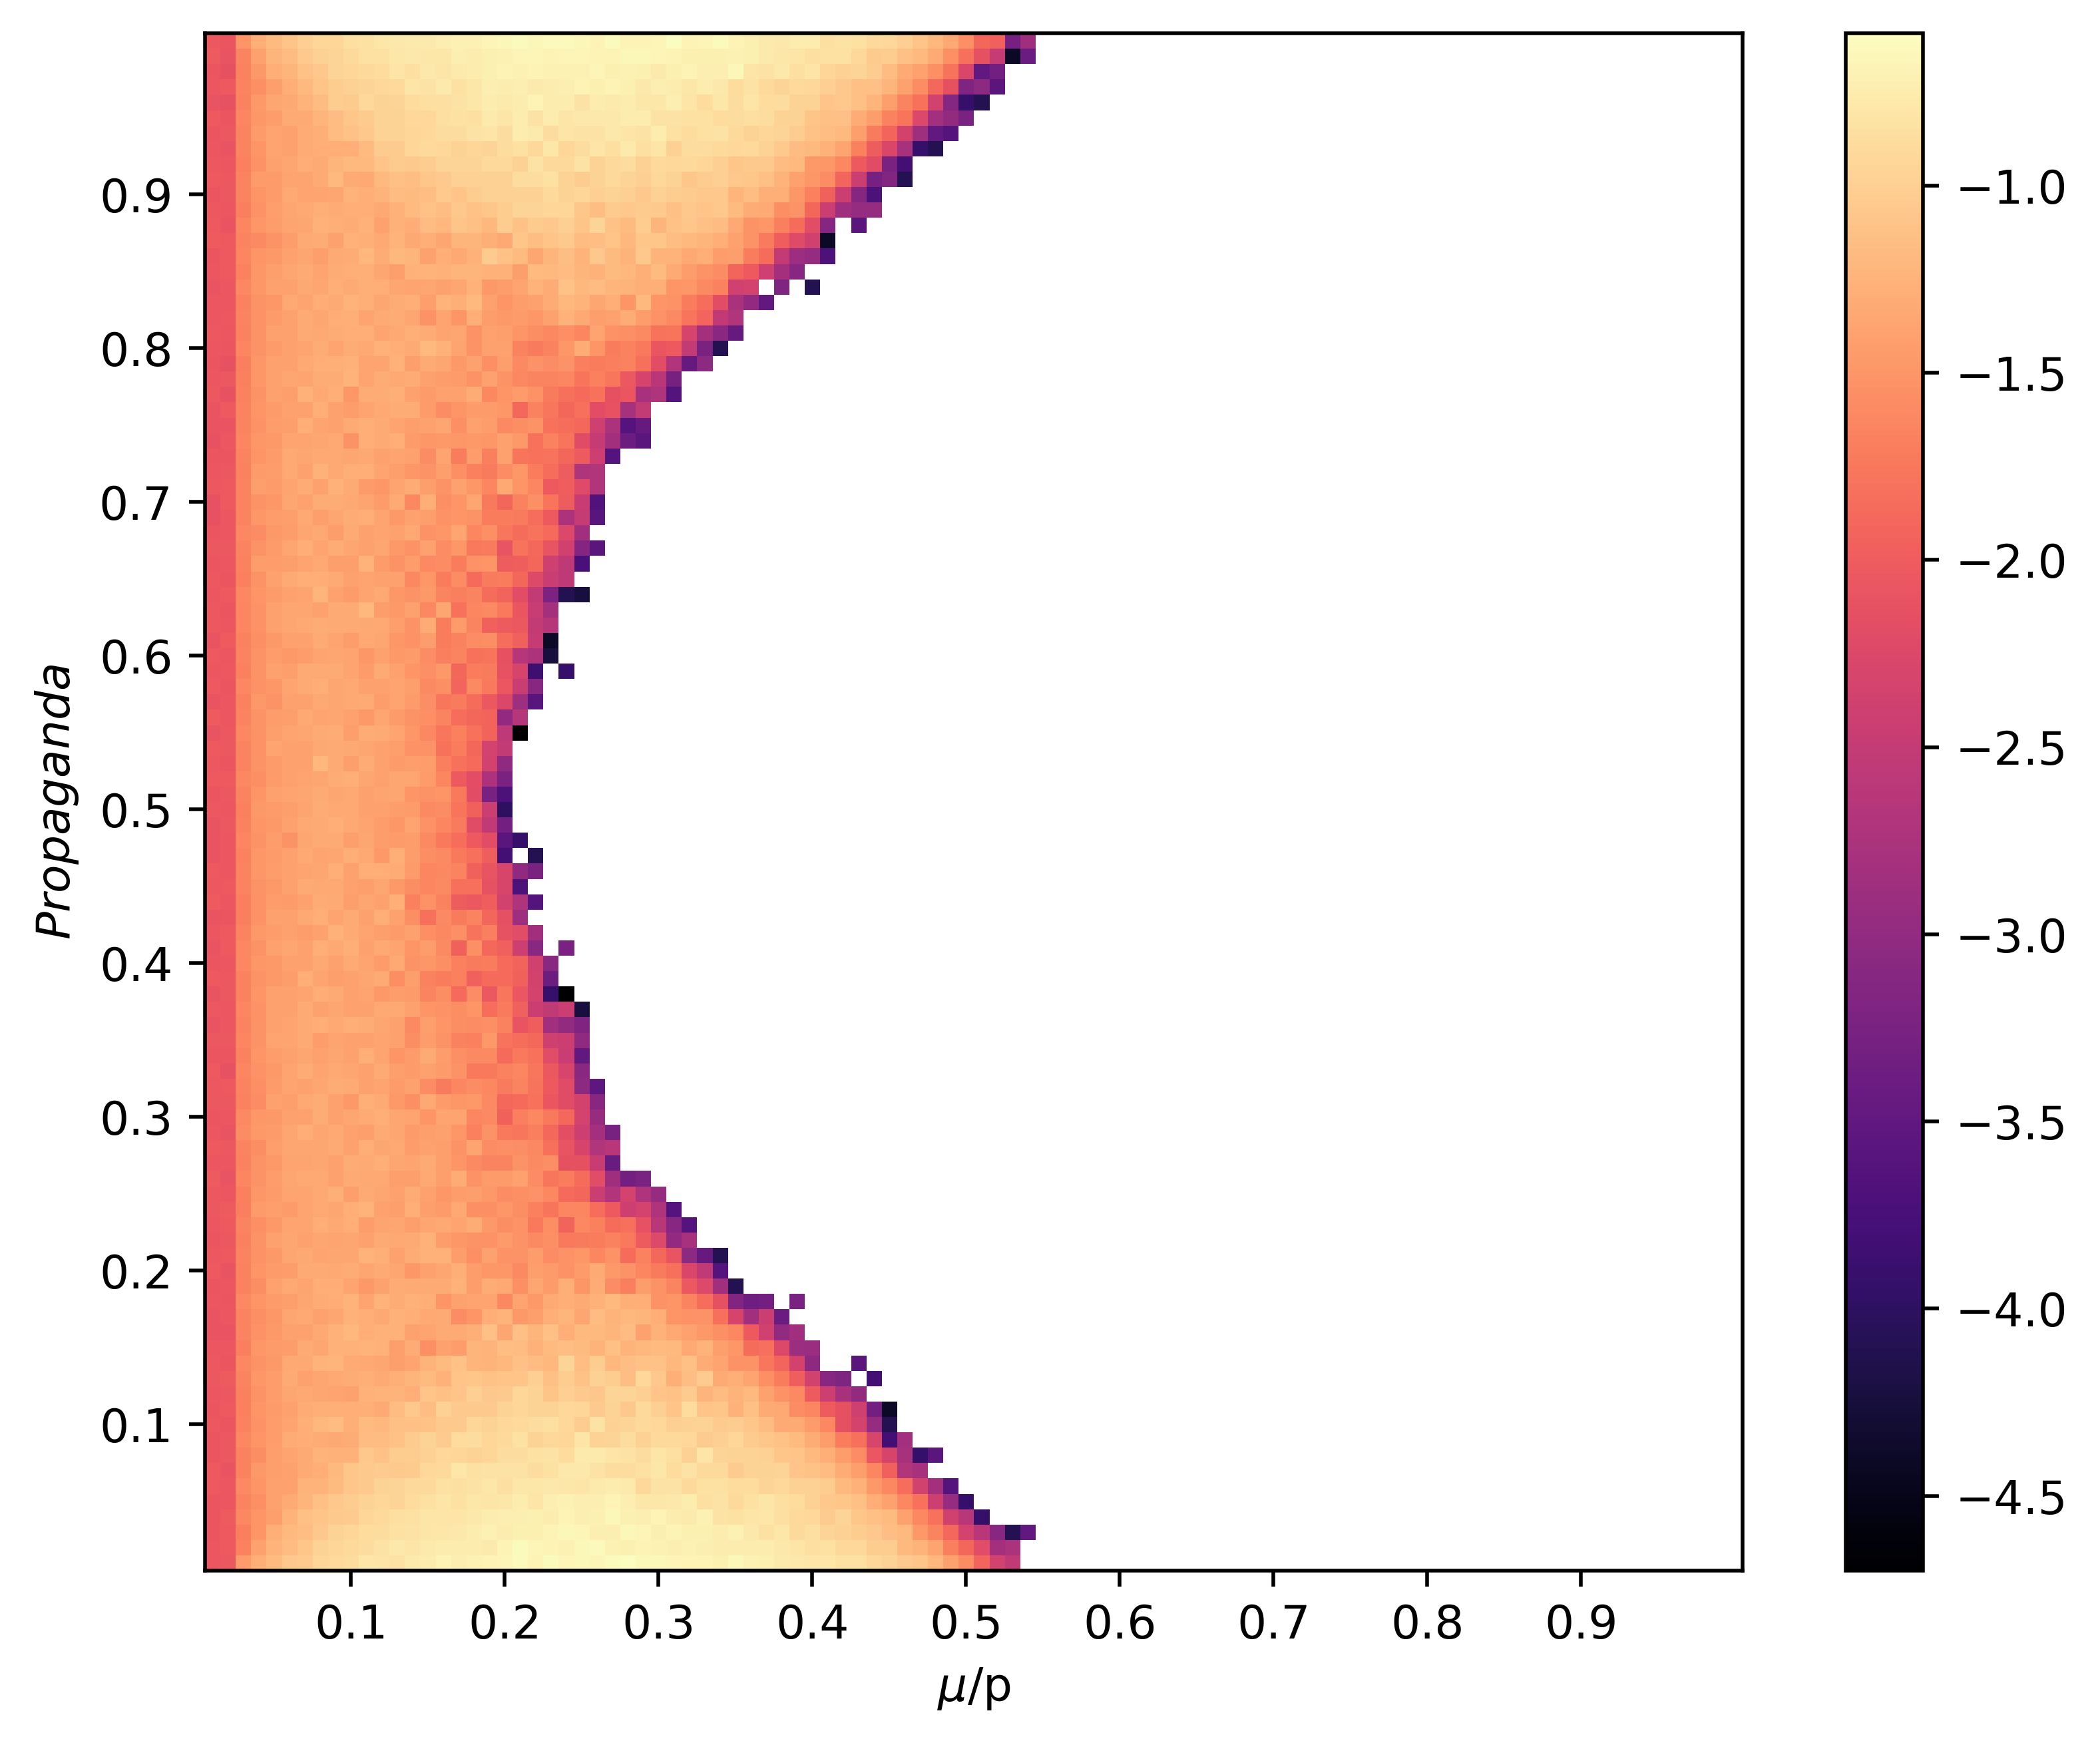

In [10]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(np.log10((stot- ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
plt.savefig("Images/log_sigma_prop_vs_mu_n1000_p100_i09.png",dpi=500)

In [16]:
profile_smax_09 = pd.read_csv('data_b_09/smax_vs_mu_i0.9_prop20.csv').mean(axis=0)
profile_smax_08 = pd.read_csv('data_b_08/smax_vs_mu_i0.8_prop20.csv').mean(axis=0)
profile_smax_10 = pd.read_csv('data_b_10/smax_vs_mu_i1.0_prop20.csv').mean(axis=0)
profile_sprop_09 = pd.read_csv('data_b_09/sprop_vs_mu_i0.9_prop20.csv').mean(axis=0)
profile_sprop_08 = pd.read_csv('data_b_08/sprop_vs_mu_i0.8_prop20.csv').mean(axis=0)
profile_sprop_10 = pd.read_csv('data_b_10/sprop_vs_mu_i1.0_prop20.csv').mean(axis=0)

## $\beta = 0.2$

In [3]:
stot = []
ptot = []
for prop in range(1,101,1):
    s = pd.read_csv(f"data_b_02/smax_vs_mu_i0.2_prop{prop}.csv")
    p = pd.read_csv(f"data_b_02/sprop_vs_mu_i0.2_prop{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

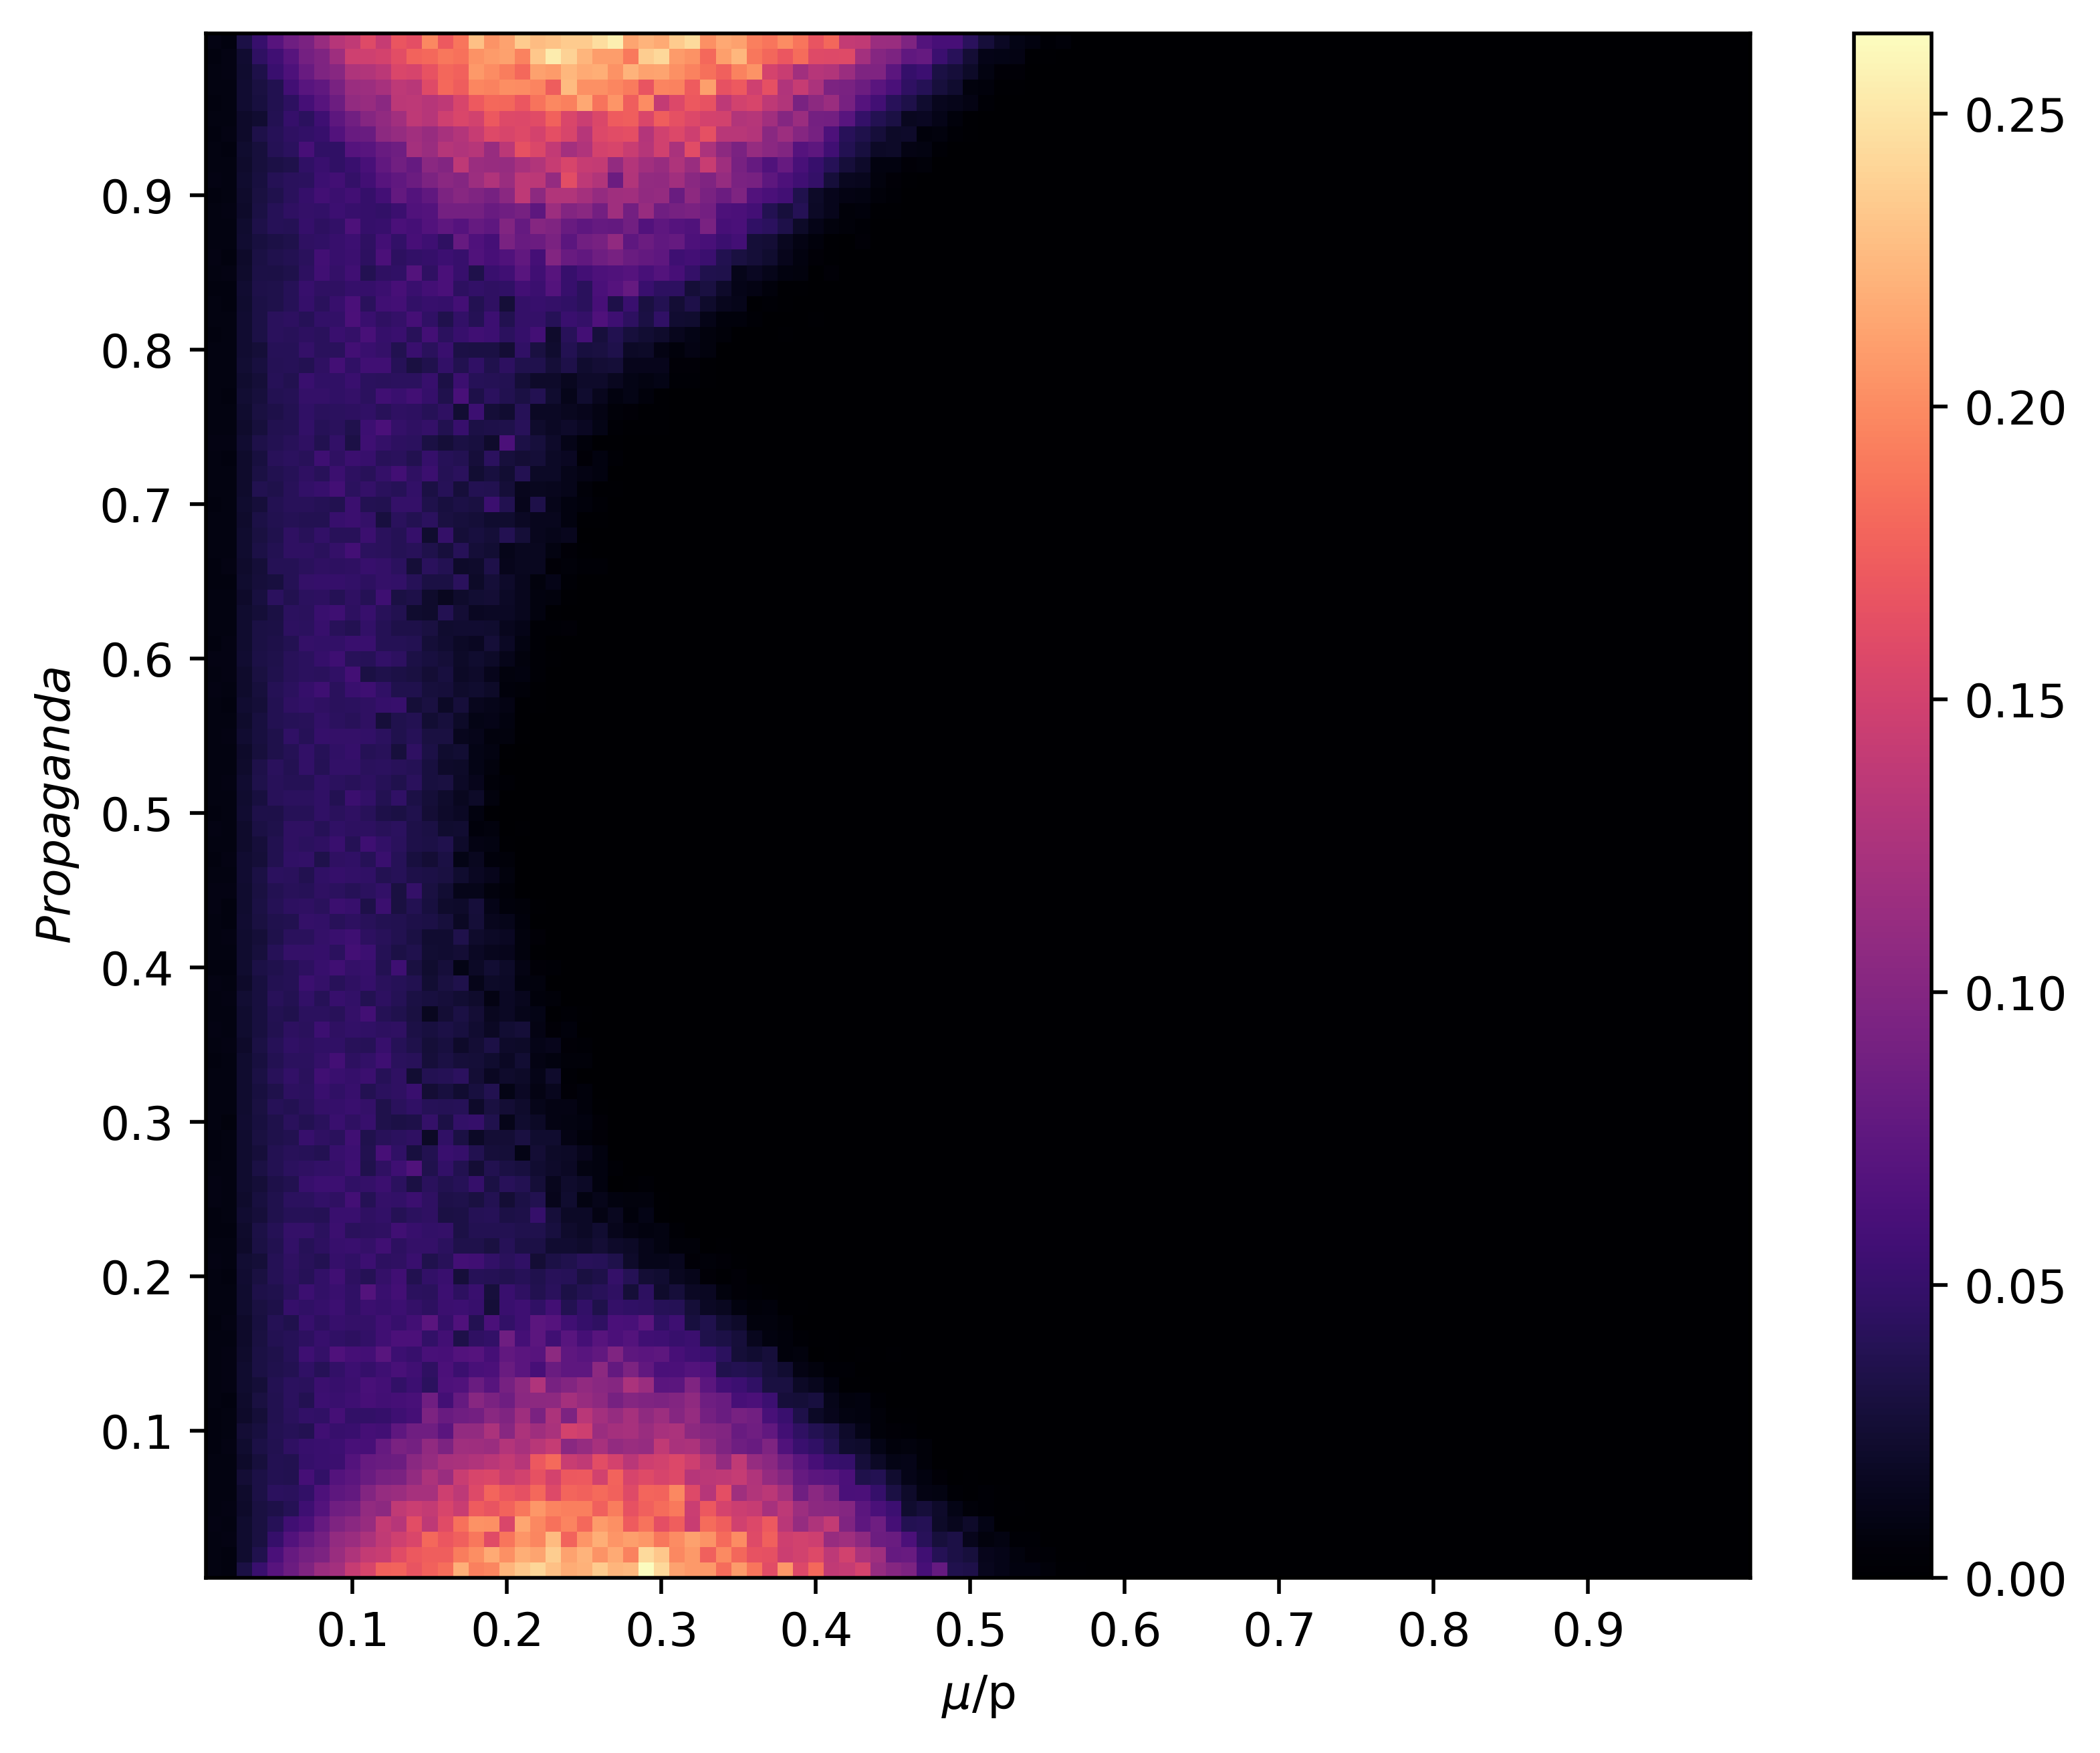

In [7]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(((stot- ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
plt.savefig("Images/sigma_prop_vs_mu_n1000_p100_i02.png",dpi=500)

## $\beta = 0.99$

In [4]:
stot = []
ptot = []
for prop in range(1,101,1):
    s = pd.read_csv(f"data_99/smax_vs_mu_i0.99_prop{prop}.csv")
    p = pd.read_csv(f"data_99/sprop_vs_mu_i0.99_prop{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

/tmp/ipykernel_41436/1286054645.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10((stot- ptot)/1000),origin = "lower", cmap='magma')


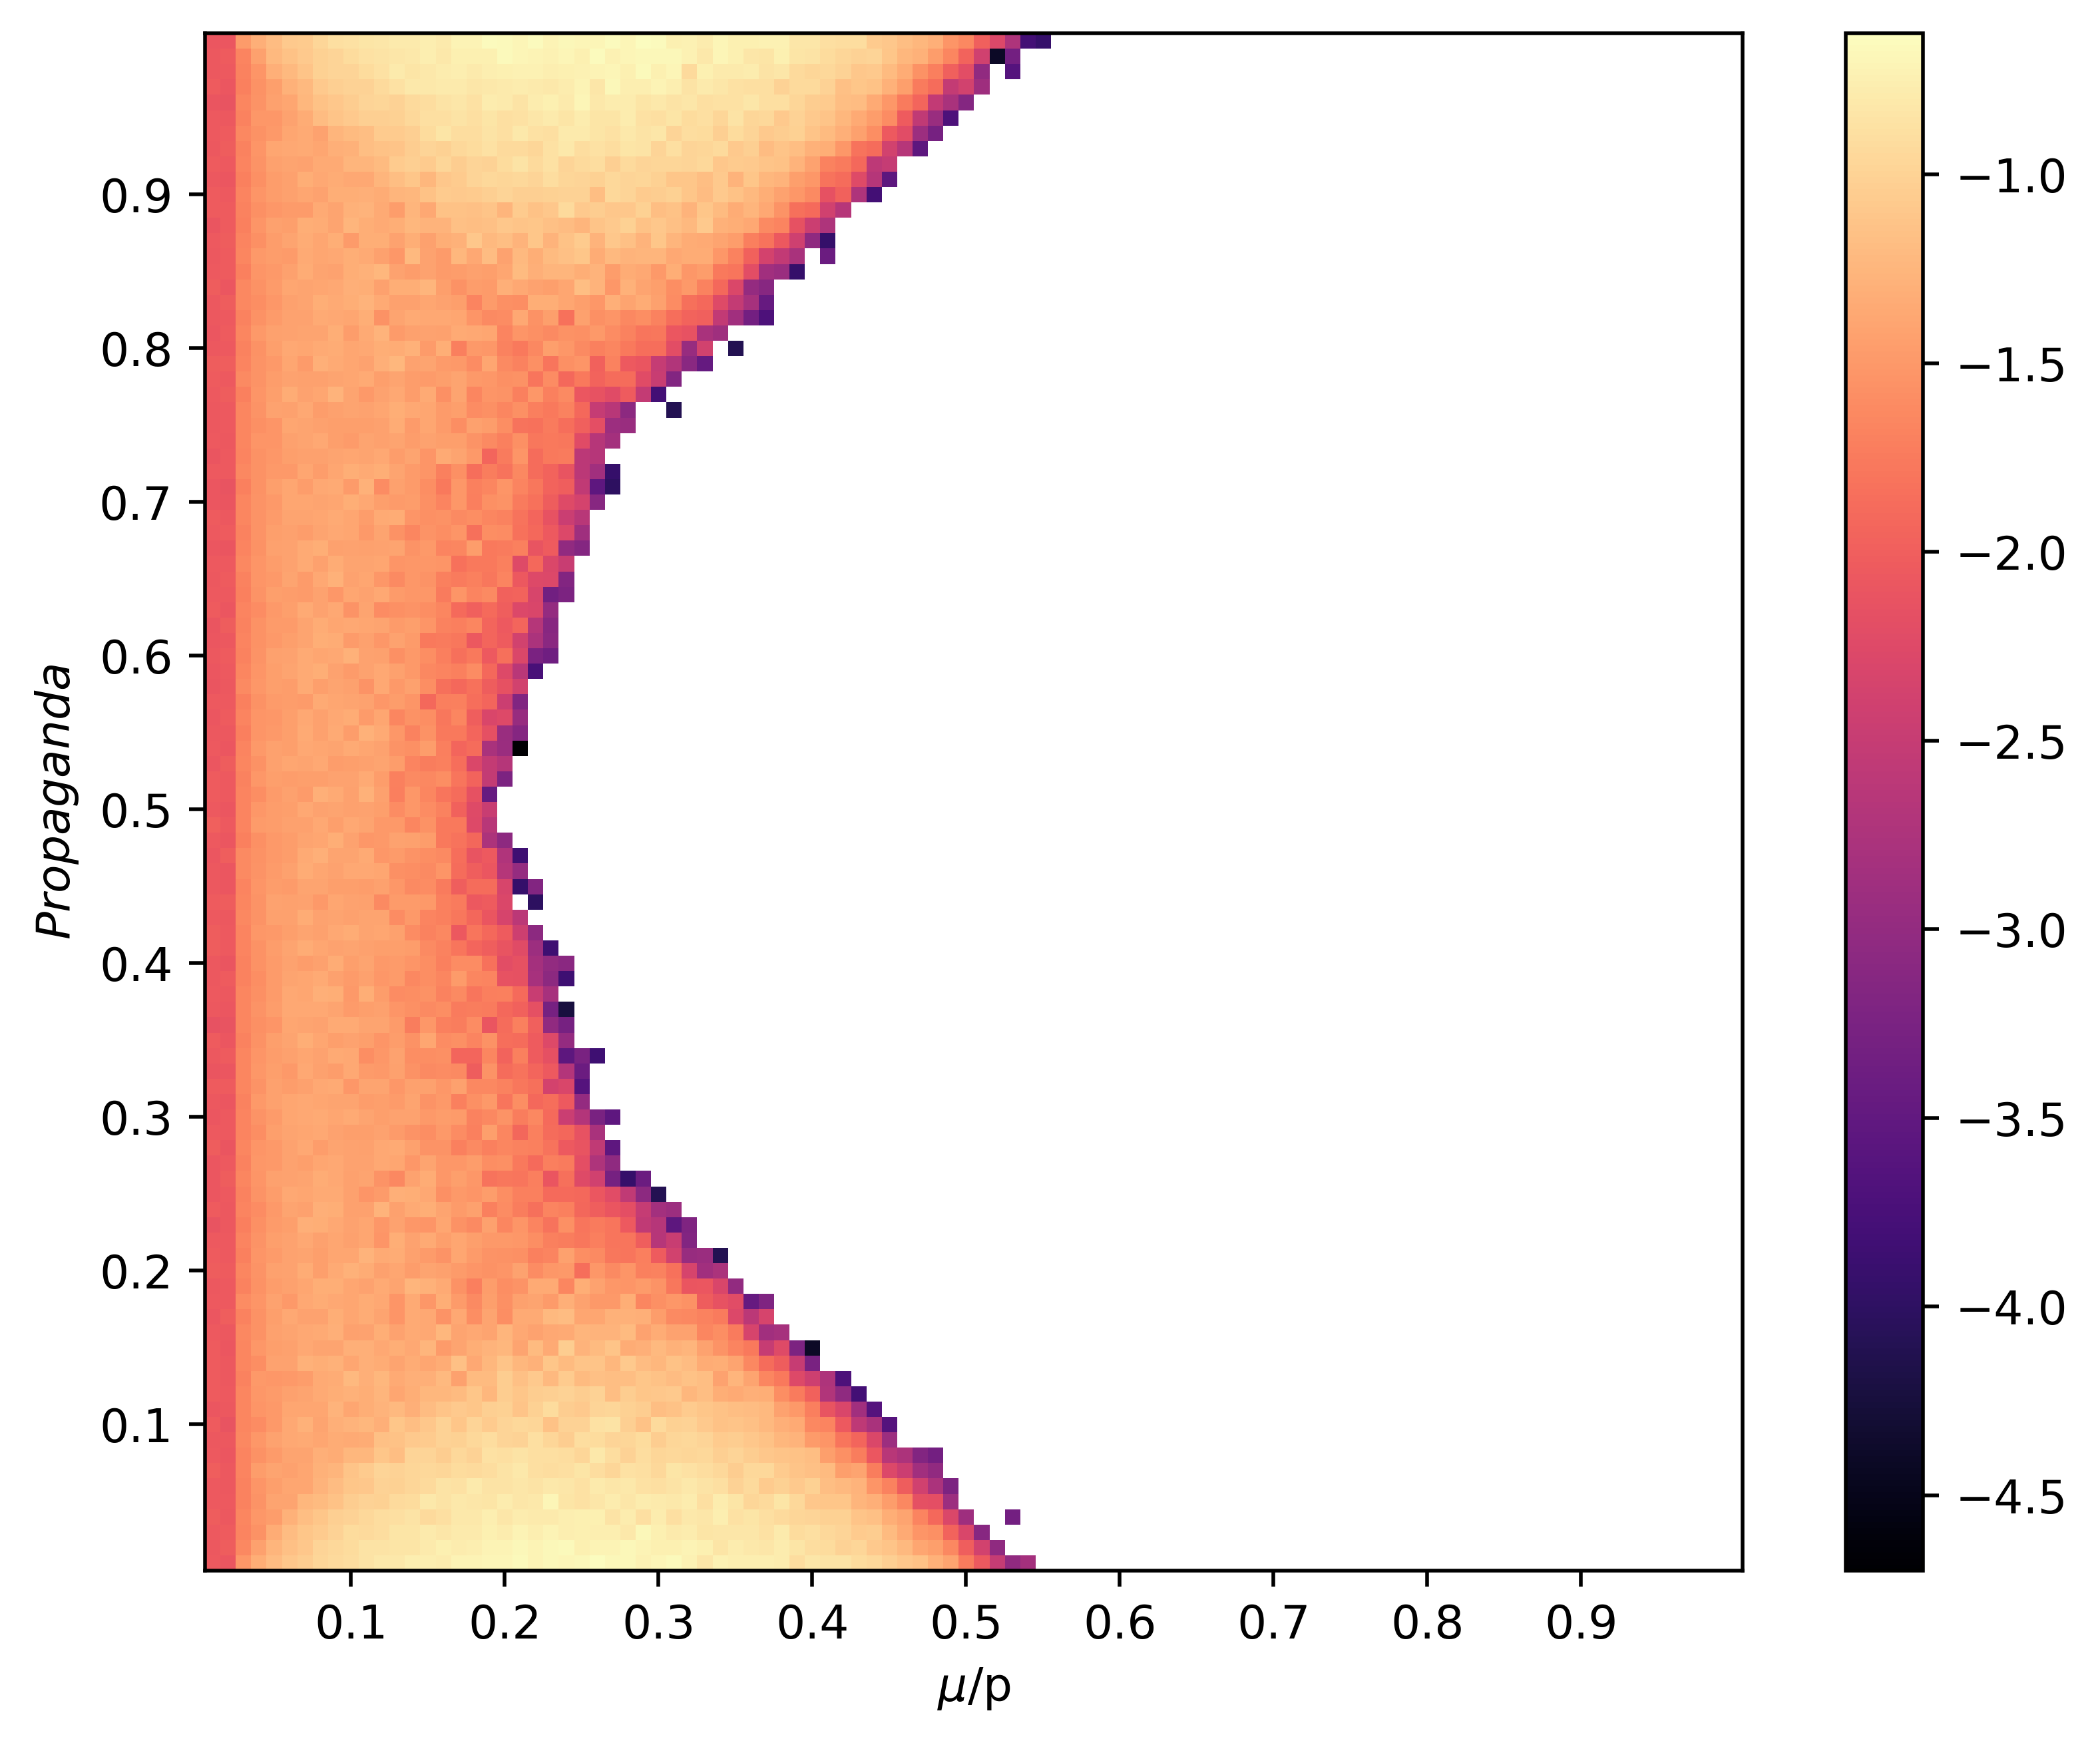

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(np.log10((stot- ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
plt.savefig("Images/logsigma_prop_vs_mu_n1000_p100_i099.png",dpi=500)

## $\beta = 0.99999$

In [2]:
stot = []
ptot = []
for prop in range(1,101,1):
    s = pd.read_csv(f"data_99999/smax_vs_mu_i0.99999_prop{prop}.csv")
    p = pd.read_csv(f"data_99999/sprop_vs_mu_i0.99999_prop{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

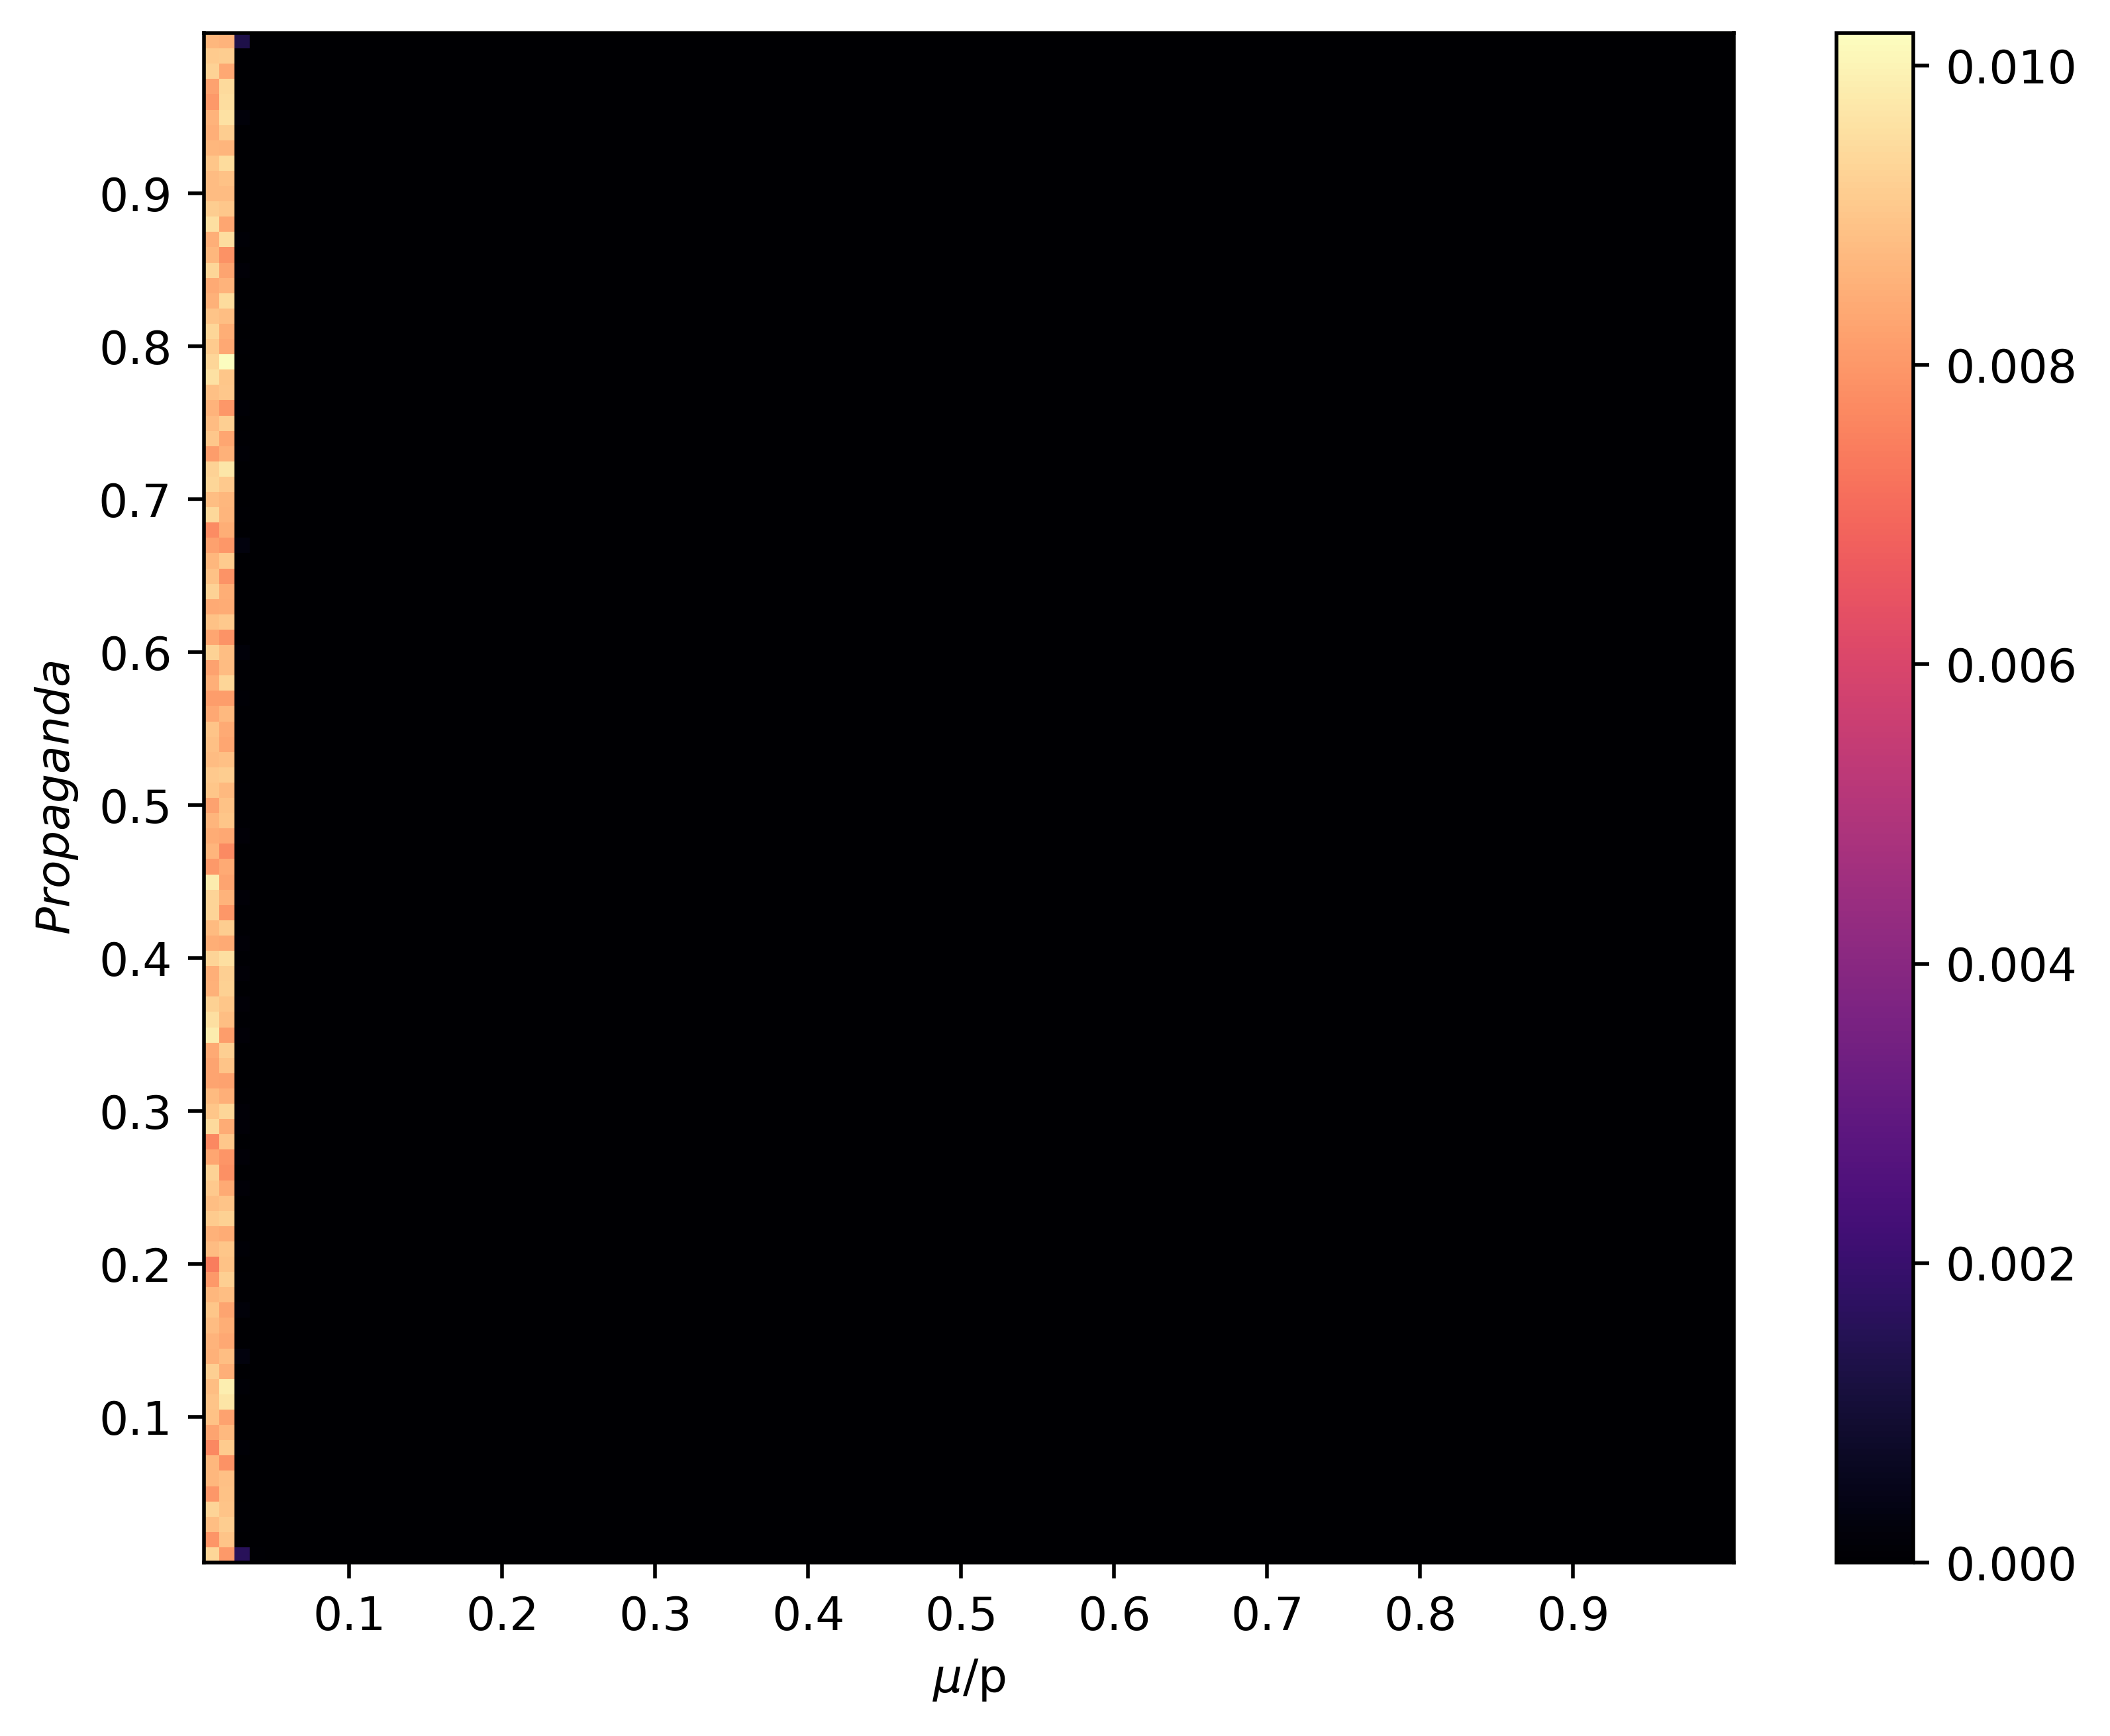

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(((stot- ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()
#plt.savefig("Images/sigma_prop_vs_mu_n1000_p100_i099999.png",dpi=500)